## Superstore sales Analysis

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [43]:
data = pd.read_csv('......./Superstore.csv', encoding_errors = "ignore")

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.shape

(9994, 21)

In [5]:
data.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data["Order Date"] = pd.to_datetime(data["Order Date"])
data["Ship Date"] = pd.to_datetime(data["Ship Date"])

### Sales and Profit Analysis

In [9]:
# Category wise Overall Profit
category_profit = data.groupby("Category")["Profit"].sum().sort_values(ascending = False)
category_profit

Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64

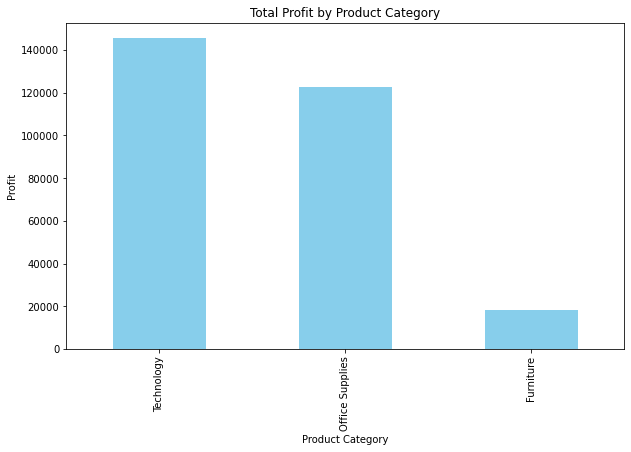

In [10]:
plt.figure(figsize=(10, 6))
category_profit.plot(kind='bar', color='skyblue')
plt.title('Total Profit by Product Category')
plt.ylabel('Profit')
plt.xlabel('Product Category')
plt.show()

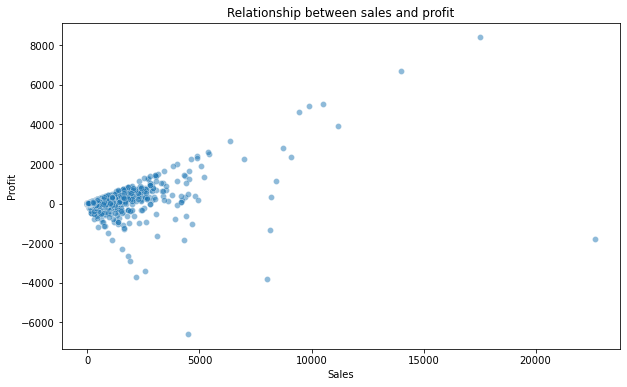

In [11]:
# Relationship between sales and profit
plt.figure(figsize = (10,6))
sns.scatterplot(x = "Sales", y = "Profit", data = data, alpha = 0.5)
plt.title("Relationship between sales and profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

In [12]:
# Which prooduct have minimum profir margin
data["Profit margin"] = data["Profit"]/data["Sales"]
data["Profit margin"]

0       0.1600
1       0.3000
2       0.4700
3      -0.4000
4       0.1125
         ...  
9989    0.1625
9990    0.1700
9991    0.0750
9992    0.4500
9993    0.3000
Name: Profit margin, Length: 9994, dtype: float64

In [13]:
negative_margin_products = data[data["Profit margin"] <= 0][["Product Name", "Sales", "Profit"]]
negative_margin_products

,Product Name,Sales,Profit
3,Bretford CR4500 Series Slim Rectangular Table,957.5775,-383.0310
14,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,-123.8580
15,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,-3.8160
23,"Global Deluxe Stacking Chair, Gray",71.3720,-1.0196
27,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,-1665.0522
...,...,...,...
9921,Acco Expandable Hanging Binders,5.7420,-4.5936
9931,O'Sullivan Living Dimensions 3-Shelf Bookcases,683.3320,-40.1960
9937,Hon 61000 Series Interactive Training Tables,71.0880,-1.7772
9962,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,-67.6704


In [14]:
# Sales volume by day
data["Order Weekday"] = data["Order Date"].dt.day_name()
data["Order Weekday"]

0        Tuesday
1        Tuesday
2         Sunday
3         Sunday
4         Sunday
          ...   
9989     Tuesday
9990      Sunday
9991      Sunday
9992      Sunday
9993    Thursday
Name: Order Weekday, Length: 9994, dtype: object

In [15]:
weekday_sales = data.groupby("Order Weekday")["Sales"].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
weekday_sales

Order Weekday
Monday       428937.8157
Tuesday      287209.5022
Wednesday     88056.9752
Thursday     321965.7785
Friday       427692.2593
Saturday     357984.6830
Sunday       385353.8464
Name: Sales, dtype: float64

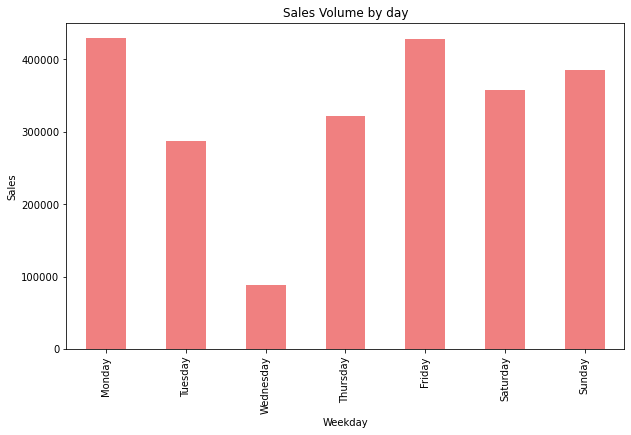

In [16]:
plt.figure(figsize=(10, 6))
weekday_sales.plot(kind='bar', color='lightcoral')
plt.title('Sales Volume by day')
plt.ylabel('Sales')
plt.xlabel('Weekday')
plt.show()

In [17]:
# Time of year where we see spike or drop in sales
data["Order Month"] = data["Order Date"].dt.month
monthly_sales = data.groupby("Order Month")["Sales"].sum()
monthly_sales

Order Month
1      94924.8356
2      59751.2514
3     205005.4888
4     137762.1286
5     155028.8117
6     152718.6793
7     147238.0970
8     159044.0630
9     307649.9457
10    200322.9847
11    352461.0710
12    325293.5035
Name: Sales, dtype: float64

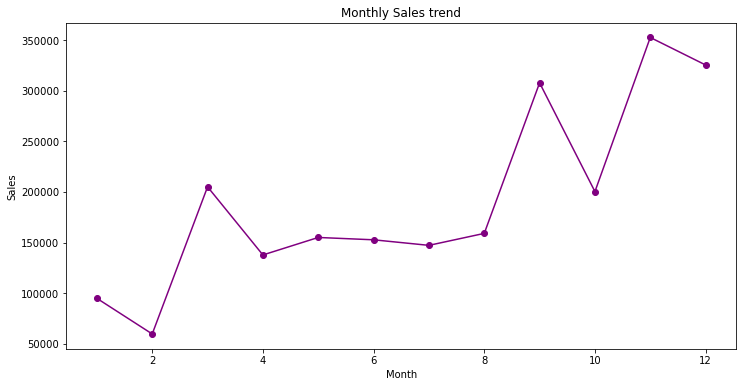

In [18]:
plt.figure(figsize = (12,6))
monthly_sales.plot(kind = "line", marker = "o", color = "purple")
plt.title("Monthly Sales trend")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.show()

In [38]:
# Profit distribution across different price ranges
data['Price Range'] = pd.cut(data['Sales'], bins=[0, 50, 100, 200, 500, 1000, data['Sales'].max()], labels=['<50', '50-100', '100-200', '200-500', '500-1000', '>1000'])
price_range_profit = data.groupby('Price Range')['Profit'].mean()
price_range_profit

Price Range
<50           3.708673
50-100       11.147793
100-200      21.960934
200-500      28.196651
500-1000     57.748690
>1000       314.047259
Name: Profit, dtype: float64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '<50'),
  Text(1, 0, '50-100'),
  Text(2, 0, '100-200'),
  Text(3, 0, '200-500'),
  Text(4, 0, '500-1000'),
  Text(5, 0, '>1000')])

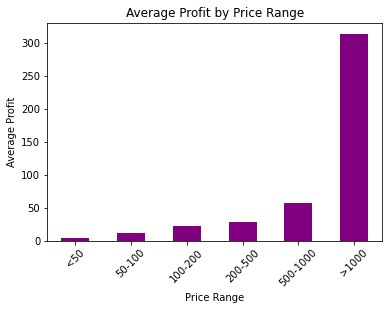

In [39]:
price_range_profit.plot(kind='bar', color='purple')
plt.title('Average Profit by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Profit')
plt.xticks(rotation=45)


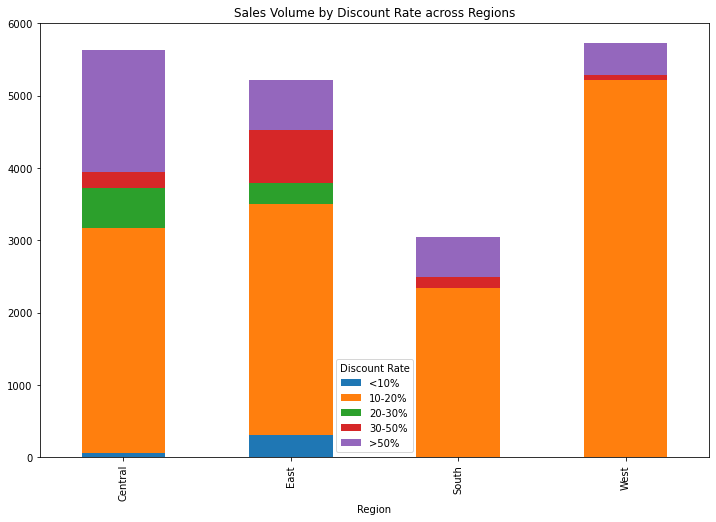

In [41]:
# Effect of discounts on sales across regions
data['Discount Rate'] = pd.cut(data['Discount'], bins=[0, 0.1, 0.2, 0.3, 0.5, data['Discount'].max()], labels=['<10%', '10-20%', '20-30%', '30-50%', '>50%'])
discount_sales = data.groupby(['Region', 'Discount Rate'])['Quantity'].sum().unstack()
discount_sales.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sales Volume by Discount Rate across Regions')
plt.show()

### Customer Behaviour and Segmentation

In [19]:
# Top 5 customers by sales and profit
top_customers_sales = data.groupby("Customer ID")["Sales"].sum().nlargest()
top_customers_profit = data.groupby("Customer ID")["Profit"].sum().nlargest()

In [20]:
top_customers_sales 

Customer ID
SM-20320    25043.050
TC-20980    19052.218
RB-19360    15117.339
TA-21385    14595.620
AB-10105    14473.571
Name: Sales, dtype: float64

In [21]:
top_customers_profit

Customer ID
TC-20980    8981.3239
RB-19360    6976.0959
SC-20095    5757.4119
HL-15040    5622.4292
AB-10105    5444.8055
Name: Profit, dtype: float64

In [22]:
# Most common Product bought by each customer segment
segement_top_products = data.groupby(["Segment", "Product Name"])["Quantity"].sum().sort_values(ascending = False).groupby(level=0).head(1)
segement_top_products

Segment      Product Name     
Consumer     Staple envelope      104
Corporate    Staples               90
Home Office  Easy-staple paper     46
Name: Quantity, dtype: int64

In [23]:
# Average order size for each customer segment
avg_order_size = data.groupby("Segment")["Quantity"].mean()
avg_order_size

Segment
Consumer       3.760547
Corporate      3.843709
Home Office    3.782389
Name: Quantity, dtype: float64

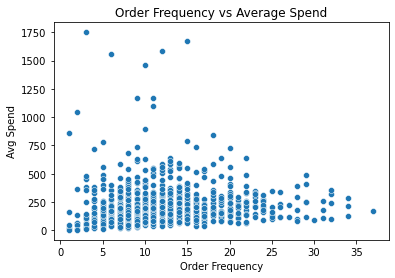

In [24]:
# Do loyal customers (high order frequency) spend more on average?
customer_order_frequency = data.groupby('Customer ID').size()
customer_avg_spend = data.groupby('Customer ID')['Sales'].mean()
loyalty_analysis = pd.DataFrame({'Order Frequency': customer_order_frequency, 'Avg Spend': customer_avg_spend})
sns.scatterplot(x='Order Frequency', y='Avg Spend', data=loyalty_analysis)
plt.title('Order Frequency vs Average Spend')
plt.show()

In [25]:
# Retention rate of customers over the years
data['Order Year'] = data['Order Date'].dt.year
customer_years = data.groupby('Customer ID')['Order Year'].nunique()
retention_rate = customer_years[customer_years > 1].count() / customer_years.count()
retention_rate

0.9735182849936949

In [26]:
customer_years

Customer ID
AA-10315    4
AA-10375    4
AA-10480    3
AA-10645    4
AB-10015    2
           ..
XP-21865    4
YC-21895    4
YS-21880    2
ZC-21910    4
ZD-21925    3
Name: Order Year, Length: 793, dtype: int64

In [45]:
# Customer lifetime value using average profit per customer
customer_profit = data.groupby('Customer ID')['Profit'].sum().sort_values(ascending = False)
customer_profit.head(10)

Customer ID
TC-20980    8981.3239
RB-19360    6976.0959
SC-20095    5757.4119
HL-15040    5622.4292
AB-10105    5444.8055
TA-21385    4703.7883
CM-12385    3899.8904
KD-16495    3038.6254
AR-10540    2884.6208
DR-12940    2869.0760
Name: Profit, dtype: float64

In [48]:
# Which segment of customers has the highest likelihood of repeat purchase
repeat_customers = data.groupby('Segment')['Customer ID'].nunique() / data['Customer ID'].nunique()
repeat_customers

Segment
Consumer       0.515763
Corporate      0.297604
Home Office    0.186633
Name: Customer ID, dtype: float64

### Geographic and Regional Analysis

In [27]:
# Total and average sales by Region
total_city_sales = data.groupby("Region").sum()
total_city_sales

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Profit margin,Order Month,Order Year
Region,,,,,,,,,
Central,11685963,151786150,501239.8908,8780,558.34,39706.3625,-241.761438,17870,4682538
East,14073919,50171698,678781.2400,10618,414.00,91522.7800,476.262381,22355,5740811
South,8213295,55875052,391721.9050,6209,238.55,46749.4303,264.900833,12103,3265400
West,15971838,293739752,725457.8245,12266,350.20,108418.4489,703.015637,25722,6456379


In [28]:
avg_sales_per_order = data.groupby('Region')['Sales'].mean().sort_values(ascending=False)
avg_sales_per_order

Region
South      241.803645
East       238.336110
West       226.493233
Central    215.772661
Name: Sales, dtype: float64

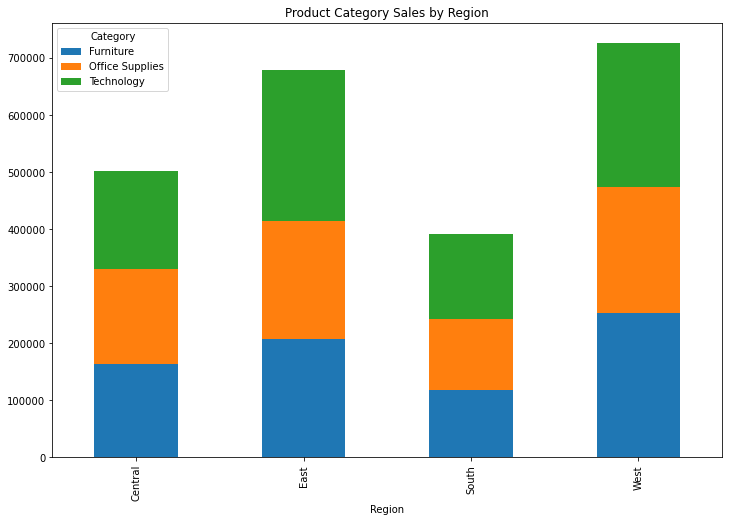

In [29]:
region_product_sales = data.groupby(['Region', 'Category'])['Sales'].sum().unstack()
region_product_sales.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Product Category Sales by Region')
plt.show()

In [30]:
# Regions with the shortest/longest shipping times
data['Shipping Time'] = (data['Ship Date'] - data['Order Date']).dt.days
avg_shipping_time = data.groupby('Region')['Shipping Time'].mean()
avg_shipping_time

Region
Central    4.058115
East       3.908708
South      3.958025
West       3.929753
Name: Shipping Time, dtype: float64

In [31]:
# Relation between region and profit margins
region_profit_margin = data.groupby('Region')['Profit'].sum() / data.groupby('Region')['Sales'].sum()
region_profit_margin

Region
Central    0.079216
East       0.134834
South      0.119343
West       0.149448
dtype: float64

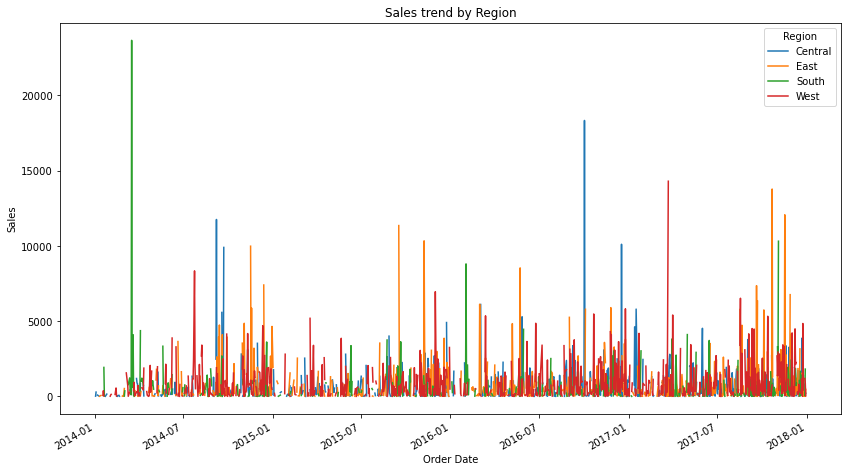

In [32]:
# Sales and Profit trend for each region over time
region_sales_trend = data.groupby(['Order Date','Region'])['Sales'].sum().unstack()
region_sales_trend.plot(figsize=(14,8))
plt.title("Sales trend by Region")
plt.ylabel('Sales')
plt.show()

### Operational Efficiency and Cost analysis

In [33]:
# Average shipping time by product category
avg_shipping_by_category = data.groupby('Category')['Shipping Time'].mean()
avg_shipping_by_category

Category
Furniture          3.917020
Office Supplies    3.983405
Technology         3.923119
Name: Shipping Time, dtype: float64

In [34]:
# Average shipping time by region
avg_shipping_by_region = data.groupby('Region')['Shipping Time'].mean()
avg_shipping_by_region

Region
Central    4.058115
East       3.908708
South      3.958025
West       3.929753
Name: Shipping Time, dtype: float64

### Product Performance and Inventory insights

In [35]:
# Top 5 most profitable product
top_profitable_products = data.groupby('Product Name')['Profit'].sum().nlargest(5)
top_profitable_products

Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Name: Profit, dtype: float64

In [36]:
# Top 5 least profitable product
least_profitable_products = data.groupby('Product Name')['Profit'].sum().nsmallest(5)
least_profitable_products

Product Name
Cubify CubeX 3D Printer Double Head Print                  -8879.9704
Lexmark MX611dhe Monochrome Laser Printer                  -4589.9730
Cubify CubeX 3D Printer Triple Head Print                  -3839.9904
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases   -2876.1156
Bush Advantage Collection Racetrack Conference Table       -1934.3976
Name: Profit, dtype: float64

In [37]:
category_discount_effect = data.groupby('Category').apply(lambda x: x[x['Discount'] > 0]['Sales'].sum())
print(category_discount_effect)

Category
Furniture          485974.5253
Office Supplies    276897.0320
Technology         446420.8330
dtype: float64
